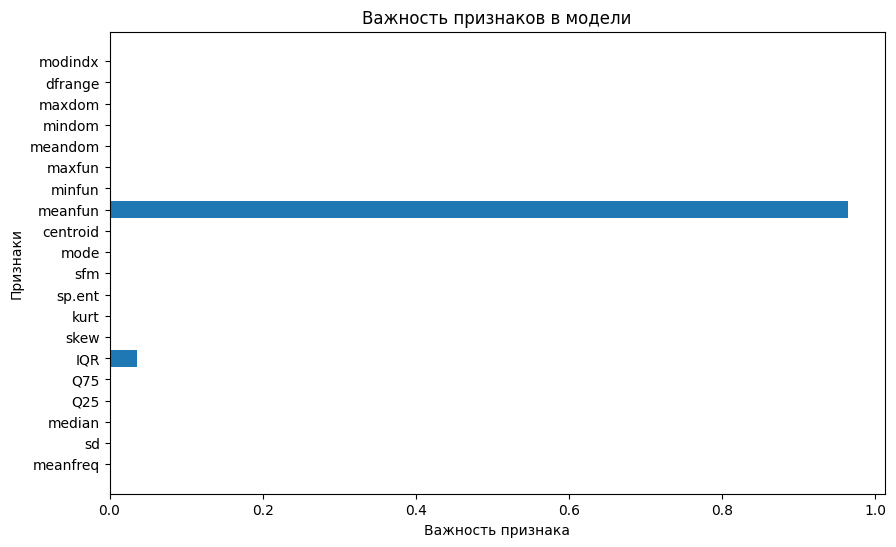

Accuracy: 0.94
Confusion Matrix:
 [[285  12]
 [ 24 313]]
Classification Report:
               precision    recall  f1-score   support

      female       0.92      0.96      0.94       297
        male       0.96      0.93      0.95       337

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



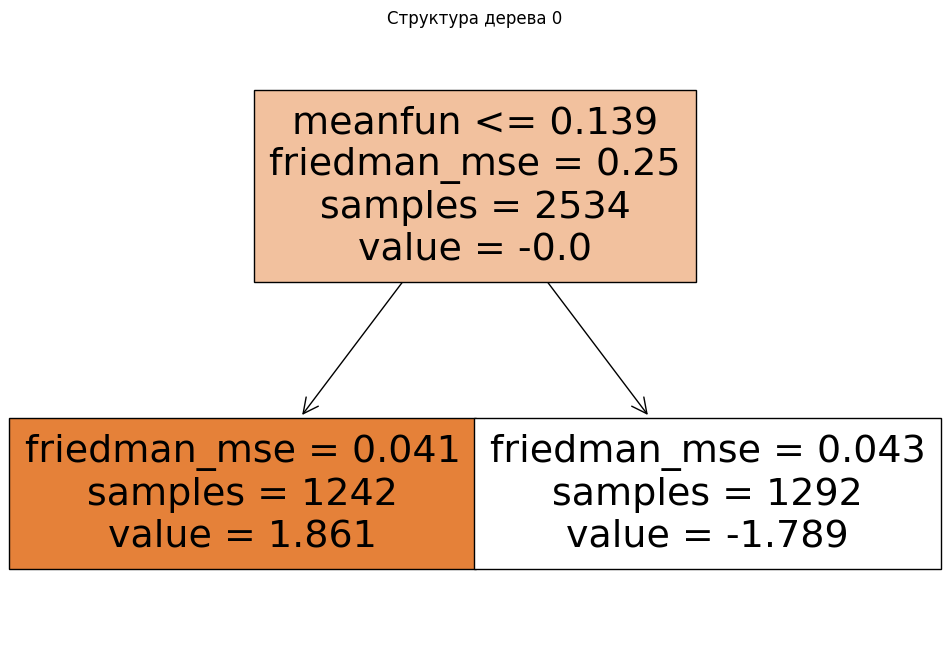

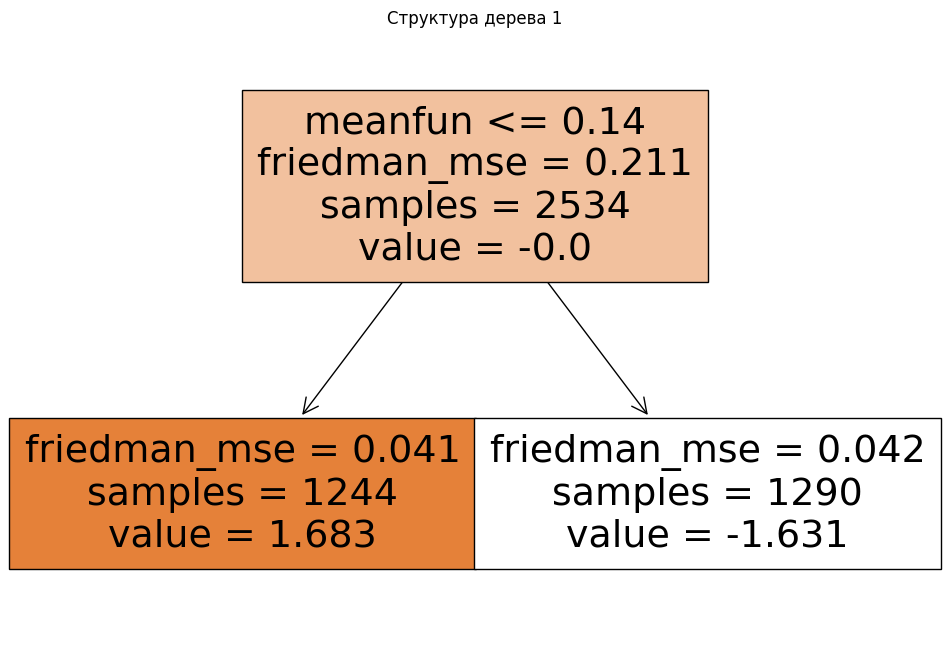

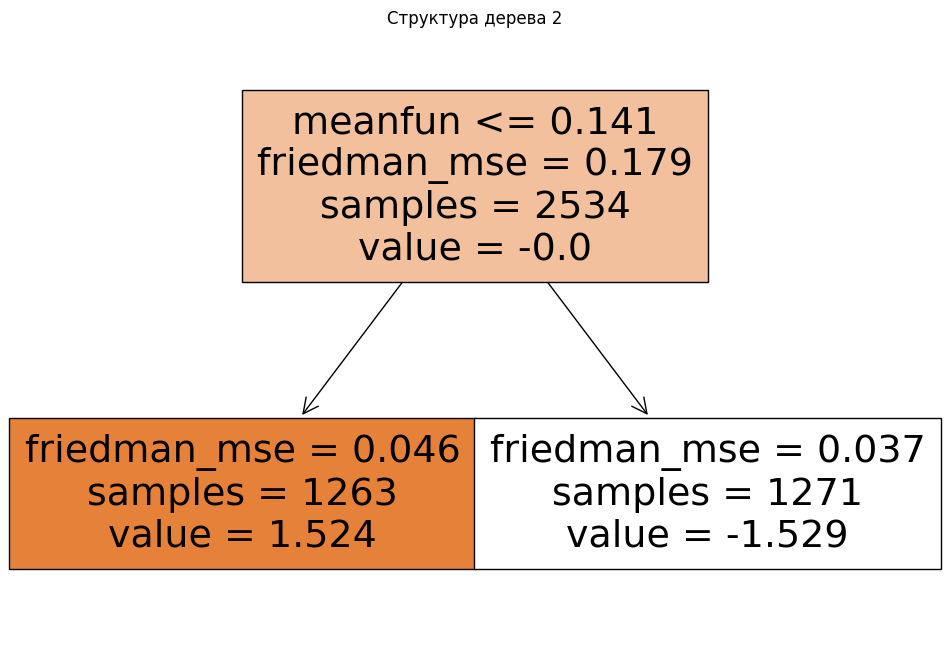

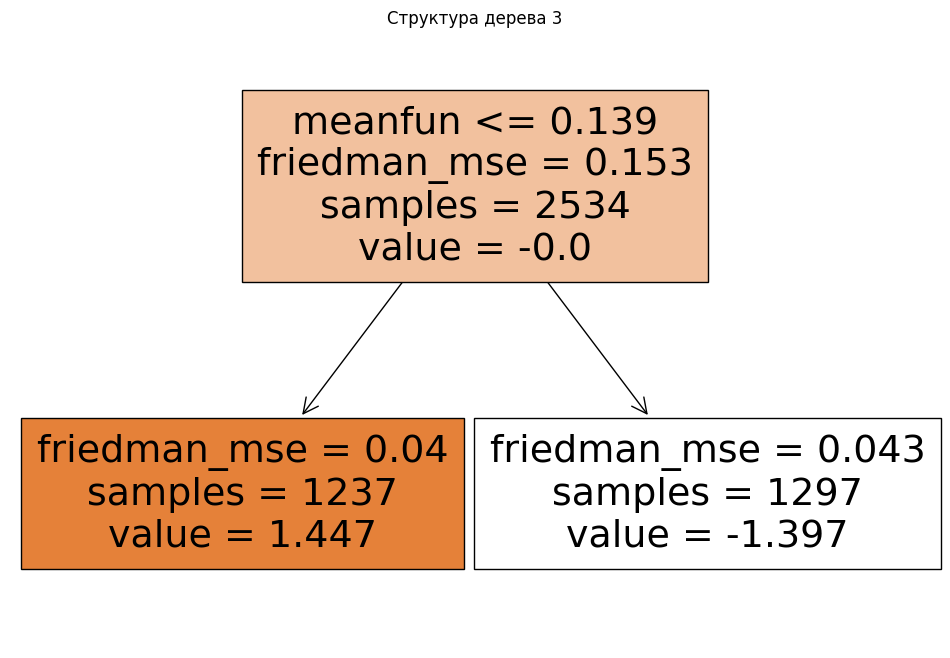

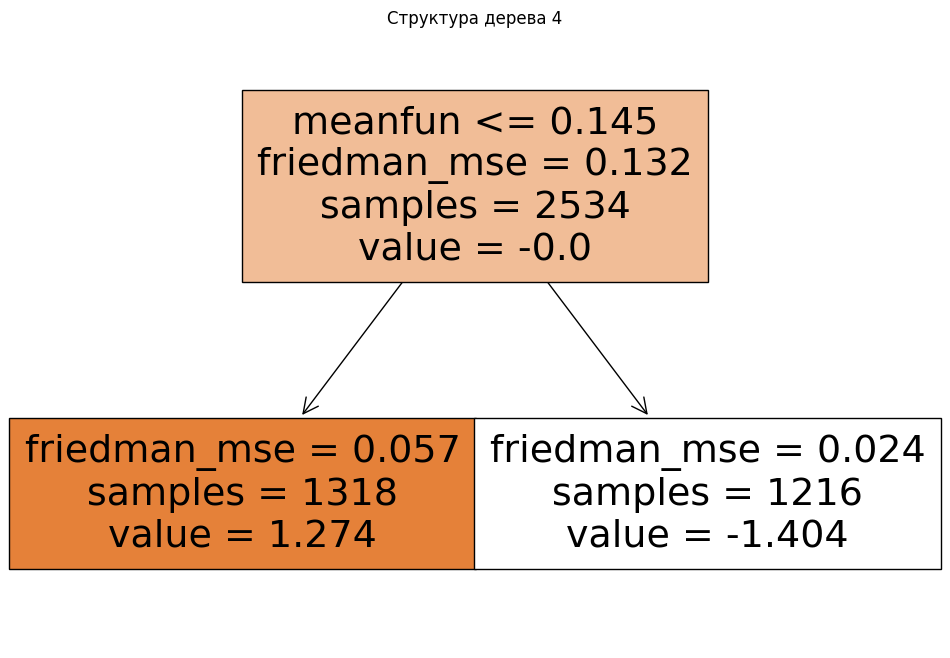

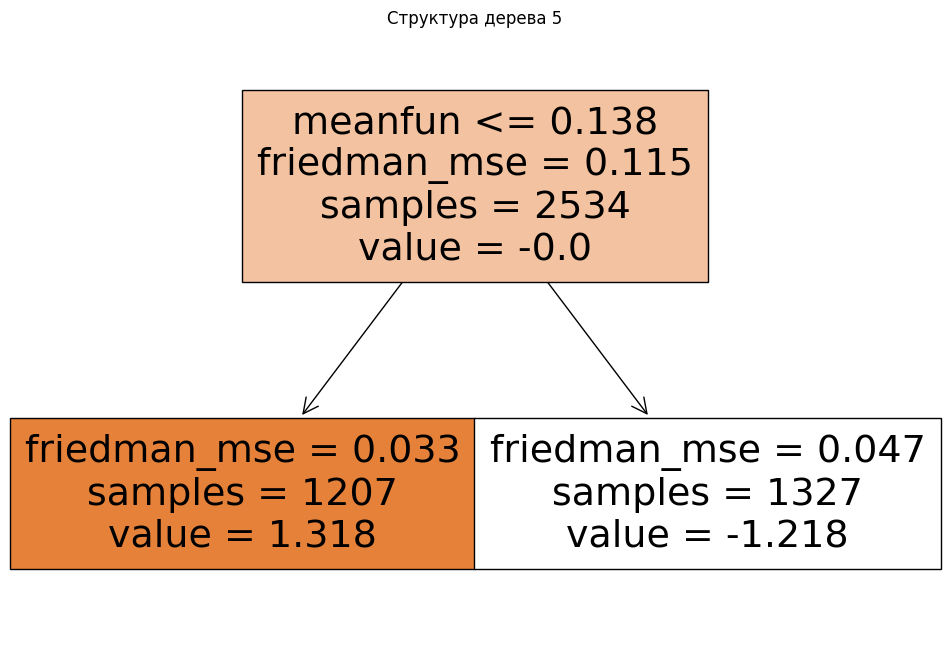

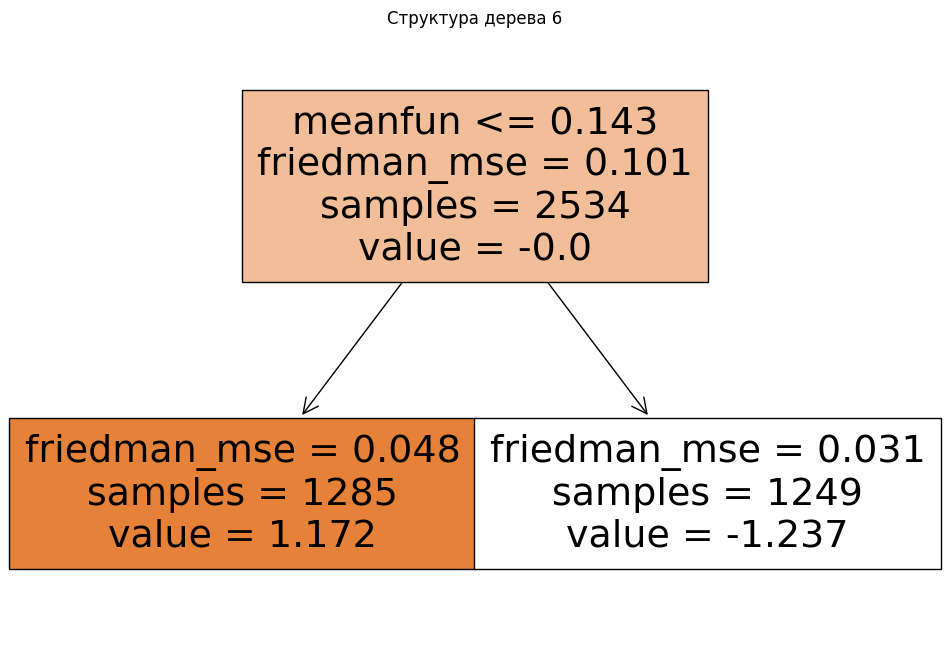

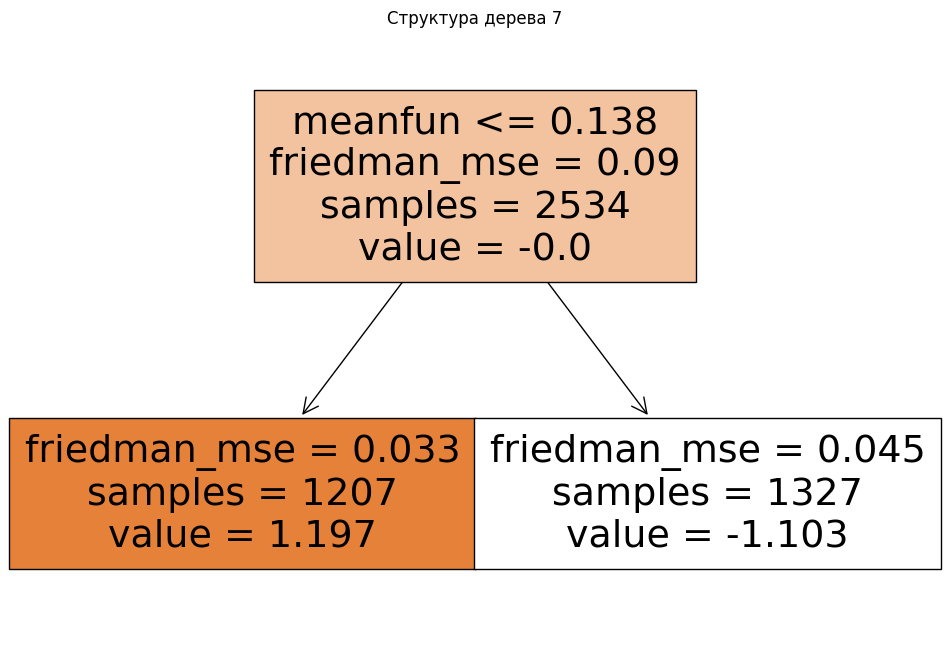

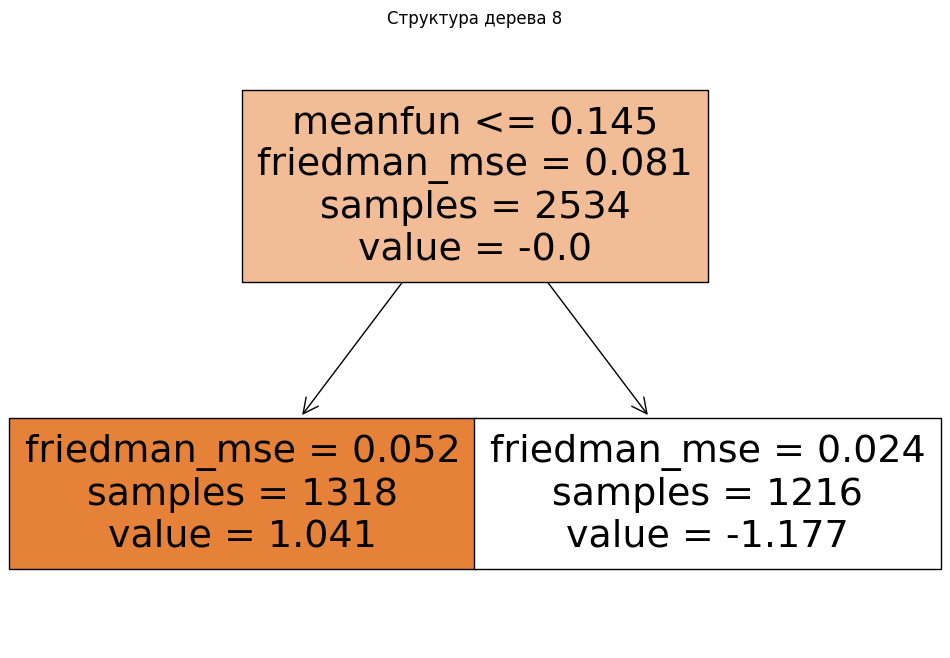

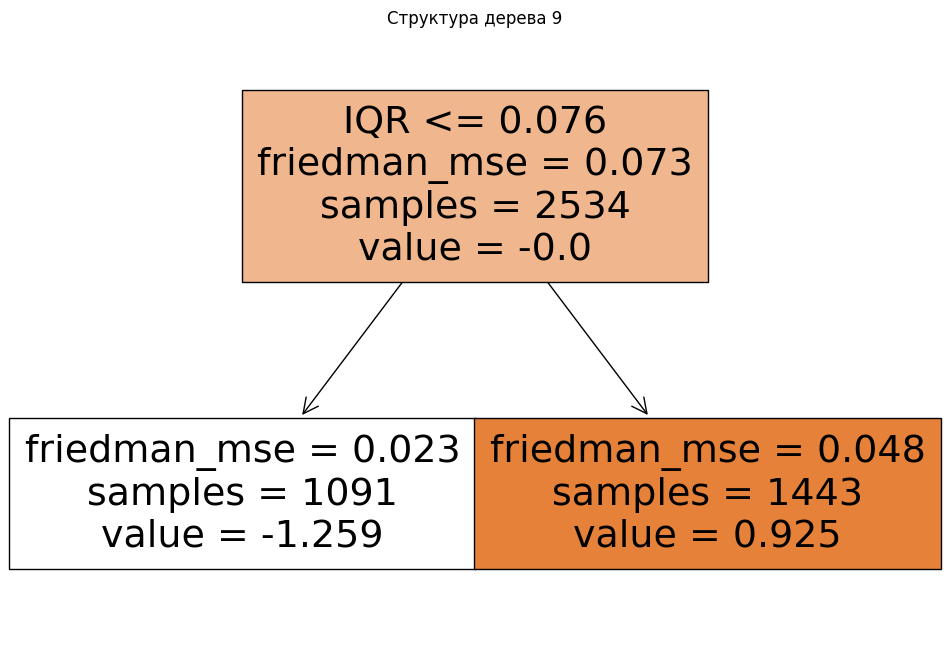

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Загрузка данных
data = pd.read_csv('voice.csv')

# Подготовка данных
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=42)
clf.fit(X_train, y_train)

# Визуализация важности признаков
feature_importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели')
plt.show()

# # Визуализация структуры каждого дерева и сохранение в формате PNG
# for i, tree in enumerate(clf.estimators_):
#     plt.figure(figsize=(12, 8))
#     plot_tree(tree[0], filled=True, feature_names=feature_names.tolist(), class_names=['male', 'female'])
#     plt.title(f'Структура дерева {i}')
#     plt.savefig(f'tree_{i}.png')

# Визуализация структуры первых 5 деревьев и сохранение в формате PNG
n_estimators = len(clf.estimators_)
first_5_trees = clf.estimators_[:5]

for i, tree in enumerate(first_5_trees):
    plt.figure(figsize=(12, 8))
    plot_tree(tree[0], filled=True, feature_names=feature_names.tolist(), class_names=['male', 'female'])
    plt.title(f'Структура дерева {i}')
    plt.savefig(f'tree_{i}.png')

# Визуализация структуры последних 5 деревьев и сохранение в формате PNG
last_5_trees = clf.estimators_[-5:]

for i, tree in enumerate(last_5_trees):
    plt.figure(figsize=(12, 8))
    plot_tree(tree[0], filled=True, feature_names=feature_names.tolist(), class_names=['male', 'female'])
    plt.title(f'Структура дерева {n_estimators - 5 + i}')
    plt.savefig(f'test_tree_{n_estimators - 5 + i}.png')

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)
